In [1]:
import matplotlib.pyplot as plt 
import pickle 
import matplotlib as mpl 
import numpy as np 

In [2]:
with open("DDPG_MDP_1to3.pkl", "rb") as f: 
    data1to3 = pickle.load(f)
with open("DDPG_MDP_4to6.pkl", "rb") as f: 
    data4to6 = pickle.load(f)
with open("DDPG_MDP_7to10.pkl", "rb") as f: 
    data7to10 = pickle.load(f)

data = {} 
for data_temp in [data1to3, data4to6, data7to10]: 
    for k, v in data_temp.items(): 
        data[k] = v 

    

In [3]:
for reward_factor, result_dict in data.items(): 
    print(np.mean(result_dict["SOCs"][-10:])) 

0.754271911389681
0.4592875644757761
0.4540491054397659
0.580000765692297
0.5770748701084216
0.5863688988585886
0.4485053889211062
0.45061945663335357
0.5718277201505454
0.5951333549838973


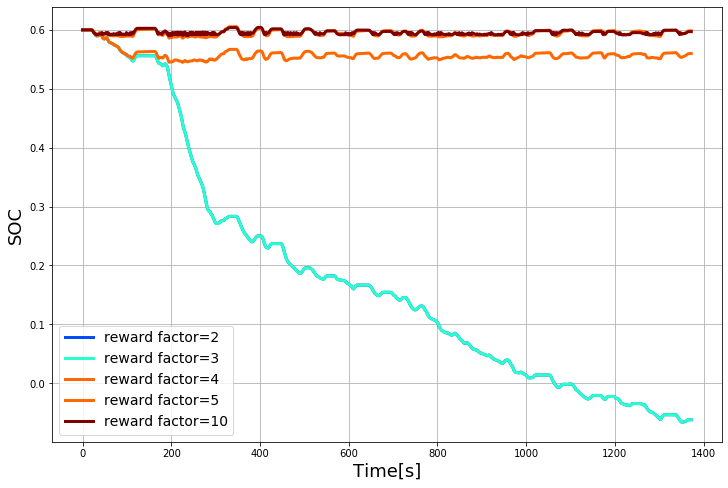

In [10]:
plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('jet')

# plt.subplot(1, 2, 1)
# plt.plot(data[1]["test_history"][-1]["SOC"], label="reward factor=1", linewidth=3, color=cmap(1/10))
plt.plot(data[2]["test_history"][-1]["SOC"], label="reward factor=2", linewidth=3, color=cmap(2/10))
plt.plot(data[3]["test_history"][-1]["SOC"], label="reward factor=3", linewidth=3, color=cmap(4/10))
plt.plot(data[4]["test_history"][-1]["SOC"], label="reward factor=4", linewidth=3, color=cmap(8/10))
plt.plot(data[5]["test_history"][-1]["SOC"], label="reward factor=5", linewidth=3, color=cmap(8/10))
plt.plot(data[10]["test_history"][-1]["SOC"], label="reward factor=10", linewidth=3, color=cmap(10/10))
plt.grid() 
plt.xlabel("Time[s]", fontsize=18) 
plt.ylabel("SOC", fontsize=18) 
plt.legend(fontsize=14) 

plt.savefig("SOC trajectory with reward factors.png")
# plt.subplot(1, 2, 2)
# plt.plot(np.cumsum(data[1]["test_history"][-1]["m_fuel"]), label="reward factor=1", linewidth=2)
# plt.plot(np.cumsum(data[2]["test_history"][-1]["m_fuel"]), label="reward factor=2", linewidth=2)
# plt.plot(np.cumsum(data[4]["test_history"][-1]["m_fuel"]), label="reward factor=4", linewidth=2)
# plt.plot(np.cumsum(data[8]["test_history"][-1]["m_fuel"]), label="reward factor=8", linewidth=2)
# plt.plot(np.cumsum(data[10]["test_history"][-1]["m_fuel"]), label="reward factor=10", linewidth=2)
# plt.grid() 
# plt.xlabel("Time[s]") 
# plt.ylabel("Cumulative Fuel Consumption[g]") 
# plt.legend() 

In [5]:
print(len(histories))

20


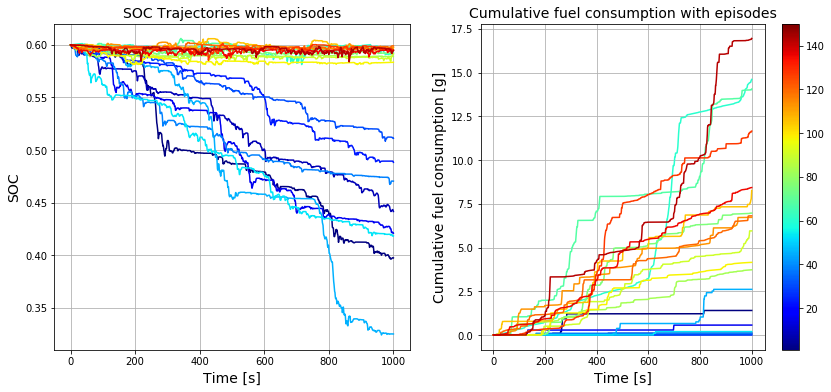

In [6]:
fig = plt.figure(figsize=(14, 6))

cmap = plt.get_cmap('jet')
norm = mpl.colors.Normalize(vmin=1, vmax=150)

plt.subplot(1, 2, 1)
for i, SOC_trajectory in enumerate(SOC_trajectories): 
    color = cmap(float(i) / len(SOC_trajectories))
    plt.plot(SOC_trajectory, c=color)
    plt.ylabel("SOC", fontsize=14)
    plt.xlabel("Time [s]", fontsize=14)
    plt.title("SOC Trajectories with episodes", fontsize=14)
plt.grid() 

plt.subplot(1, 2, 2)
for i, fuel_trajectory in enumerate(fuel_trajectories): 
    color = cmap(float(i) / len(SOC_trajectories))
    fuel_trajectory = np.cumsum(fuel_trajectory)
    plt.plot(fuel_trajectory, c=color)
    plt.ylabel("Cumulative fuel consumption [g]", fontsize=14)
    plt.xlabel("Time [s]", fontsize=14)
    plt.title("Cumulative fuel consumption with episodes", fontsize=14)
plt.grid() 
    
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap))
plt.savefig("training process.png")

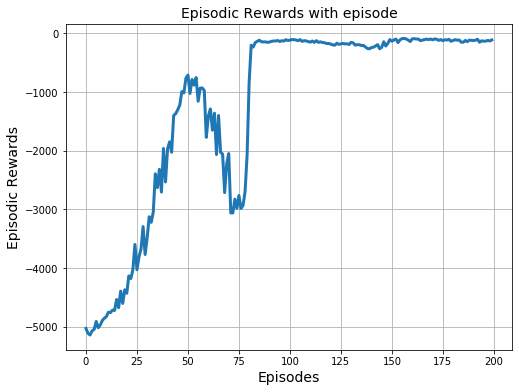

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(rewards, linewidth=3)
plt.ylabel("Episodic Rewards", fontsize=14)
plt.xlabel("Episodes", fontsize=14)
plt.title("Episodic Rewards with episode", fontsize=14)
plt.grid() 
plt.savefig("Episodic Rewards.png")